In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import time
import matplotlib. pyplot as plt
from sklearn.metrics import silhouette_samples
from matplotlib import cm
import numpy as np
import math

# 

In [2]:
weather = pd.read_csv('weather_info.csv' , engine='python')
weather.head()

,date,Times of Day,pressure_state,pressure_Sea,Precipitation_amount,temperature,Dew point temperature,pressure_Vapor,Humidity,wind_speed,Wind_direction,Daylight_hours,solar radiation_amount,snowfall,Snow_cover
0,2016/1/1,1,1018.8,1021.8,0.0,5.2,1.3,6.7,76,2.4,0,0.0,0.0,0,0
1,2016/1/1,2,1019.3,1022.3,0.0,5.0,0.4,6.3,72,3.0,0,0.0,0.0,0,0
2,2016/1/1,3,1019.8,1022.8,0.0,4.0,-0.2,6.0,74,1.9,0,0.0,0.0,0,0
3,2016/1/1,4,1020.3,1023.3,0.0,3.9,-0.3,6.0,74,2.0,0,0.0,0.0,0,0
4,2016/1/1,5,1021.0,1024.0,0.0,5.1,-1.6,5.4,62,2.5,0,0.0,0.0,0,0


In [3]:
print('データの形式：',format(weather.shape))
print('欠損の数：',format(weather.isnull().sum().sum()))

データの形式： (43848, 15)
欠損の数： 0


In [4]:
weather_renew = weather[weather['Times of Day'] == 19]
weather_renew.head()

,date,Times of Day,pressure_state,pressure_Sea,Precipitation_amount,temperature,Dew point temperature,pressure_Vapor,Humidity,wind_speed,Wind_direction,Daylight_hours,solar radiation_amount,snowfall,Snow_cover
18,2016/1/1,19,1024.1,1027.1,0.0,8.6,-6.4,3.8,34,1.5,0,0.0,0.0,0,0
42,2016/1/2,19,1016.2,1019.2,0.0,7.9,-0.3,6.0,56,1.1,0,0.0,0.0,0,0
66,2016/1/3,19,1011.8,1014.7,0.0,10.8,6.6,9.7,75,1.0,0,0.0,0.0,0,0
90,2016/1/4,19,1008.7,1011.6,0.0,9.2,2.8,7.4,64,1.0,0,0.0,0.0,0,0
114,2016/1/5,19,1013.0,1015.9,0.0,12.2,2.4,7.2,51,1.1,0,0.0,0.0,0,0


In [5]:
weather_about = weather_renew[['date','pressure_state','temperature','Humidity','wind_speed']]
weather_about.head()

,date,pressure_state,temperature,Humidity,wind_speed
18,2016/1/1,1024.1,8.6,34,1.5
42,2016/1/2,1016.2,7.9,56,1.1
66,2016/1/3,1011.8,10.8,75,1.0
90,2016/1/4,1008.7,9.2,64,1.0
114,2016/1/5,1013.0,12.2,51,1.1


In [6]:
lot = pd.read_csv('result.csv' , engine='python')
lot.head()

,No.,date,Winning_number
0,1.0,1994/10/7,191.0
1,2.0,1994/10/14,988.0
2,3.0,1994/10/21,194.0
3,4.0,1994/10/28,105.0
4,5.0,1994/11/4,592.0


In [7]:
lot_2016 = lot[lot['date'].str.contains('2016' , na=False)]
lot_2016.head()

,No.,date,Winning_number
3528,4309.0,2016/1/4,748.0
3529,4310.0,2016/1/5,988.0
3530,4311.0,2016/1/6,274.0
3531,4312.0,2016/1/7,603.0
3532,4313.0,2016/1/8,797.0


In [8]:
lot_2016 = lot[lot['date'].str.contains('2021/1' , na=False)]
lot_2016.head()

,No.,date,Winning_number
4258,5599.0,2021/1/4,489.0
4259,5600.0,2021/1/5,715.0
4260,5601.0,2021/1/6,325.0
4261,5602.0,2021/1/7,762.0
4262,5603.0,2021/1/8,229.0


In [9]:
lot_wed = pd.merge(weather_about, lot, on='date')
lot_wed.head()

,date,pressure_state,temperature,Humidity,wind_speed,No.,Winning_number
0,2016/1/4,1008.7,9.2,64,1.0,4309.0,748.0
1,2016/1/5,1013.0,12.2,51,1.1,4310.0,988.0
2,2016/1/6,1012.6,9.2,66,2.3,4311.0,274.0
3,2016/1/7,1011.2,8.8,33,5.2,4312.0,603.0
4,2016/1/8,1009.0,7.1,50,1.2,4313.0,797.0


In [79]:
lot_wed_new = lot_wed[['pressure_state','temperature','Humidity','wind_speed','Winning_number']]
lot_wed_new.head(9)

,pressure_state,temperature,Humidity,wind_speed,Winning_number
0,1008.7,9.2,64,1.0,748.0
1,1013.0,12.2,51,1.1,988.0
2,1012.6,9.2,66,2.3,274.0
3,1011.2,8.8,33,5.2,603.0
4,1009.0,7.1,50,1.2,797.0
5,1013.1,7.9,62,2.6,787.0
6,1010.9,3.8,74,1.9,946.0
7,1008.6,6.6,54,2.8,81.0
8,1009.3,7.6,46,2.5,727.0


In [89]:
win_list = []
for i in range(len(lot_wed_new)):
    lot_wed_sub = lambda x: str(int(lot_wed_new.iloc[x,4])) if int(lot_wed_new.iloc[x,4]) >= 100 else str(int(lot_wed_new.iloc[x,4])).zfill(3)
    x = [int(a) for a in lot_wed_sub(i)]
    win_list.append(x)
    
win_df = pd.DataFrame(win_list,
                  columns=['win_first', 'win_second', 'win_third'])
win_df.head(9)

,win_first,win_second,win_third
0,7,4,8
1,9,8,8
2,2,7,4
3,6,0,3
4,7,9,7
5,7,8,7
6,9,4,6
7,0,8,1
8,7,2,7


In [96]:
lot_wed_df = lot_wed_new.join(win_df)
lot_wed_df = lot_wed_df[['pressure_state','temperature','Humidity','wind_speed','win_first', 'win_second', 'win_third']]
lot_wed_df.head()

,pressure_state,temperature,Humidity,wind_speed,win_first,win_second,win_third
0,1008.7,9.2,64,1.0,7,4,8
1,1013.0,12.2,51,1.1,9,8,8
2,1012.6,9.2,66,2.3,2,7,4
3,1011.2,8.8,33,5.2,6,0,3
4,1009.0,7.1,50,1.2,7,9,7


In [97]:
#標準化
sc = StandardScaler()
sc.fit(lot_wed_df)
lot_wed_std = sc.transform(lot_wed_df)
lot_wed_std

array([[-0.19867714, -0.91656602, -0.26327745, ...,  0.88305689,
        -0.1269236 ,  1.23979411],
       [ 0.41940765, -0.53746923, -0.94761134, ...,  1.56629115,
         1.27692839,  1.23979411],
       [ 0.36191139, -0.91656602, -0.15799532, ..., -0.82502877,
         0.92596539, -0.1849201 ],
       ...,
       [ 0.73563708, -1.0808413 ,  0.94746712, ...,  1.56629115,
        -0.8288496 ,  0.17125845],
       [ 0.2325448 , -0.84074667, -0.26327745, ..., -0.14179451,
        -0.4778866 ,  1.59597267],
       [-2.71413851, -1.32093593, -1.47402202, ..., -1.50826303,
        -1.1798126 , -0.54109865]])

In [102]:
#KMeansクラスの初期化
kmeans = KMeans(init = 'random',n_clusters = 5,random_state = 0)
#クラスターの重心を計算
kmeans.fit(lot_wed_df)
#クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name ='cluster_number')
#クラスター番号と件数を表示
labels.value_counts(sort = False)

0    116
1    152
2    155
3    144
4    163
Name: cluster_number, dtype: int64

Text(0, 0.5, 'count')

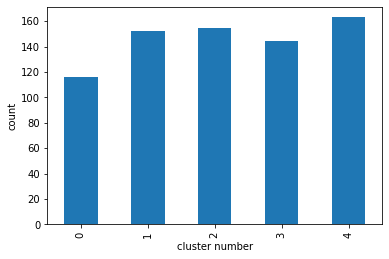

In [103]:
ax = labels.value_counts(sort = False).plot(kind = 'bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [105]:
#金融機関のデータにクラスター番号のデータを結合
lot_wed_with_cluster = pd.concat([labels,lot_wed_df],axis = 1)
lot_wed_with_cluster.head()

,cluster_number,pressure_state,temperature,Humidity,wind_speed,win_first,win_second,win_third
0,4,1008.7,9.2,64,1.0,7,4,8
1,2,1013.0,12.2,51,1.1,9,8,8
2,4,1012.6,9.2,66,2.3,2,7,4
3,2,1011.2,8.8,33,5.2,6,0,3
4,2,1009.0,7.1,50,1.2,7,9,7
5,4,1013.1,7.9,62,2.6,7,8,7
6,4,1010.9,3.8,74,1.9,9,4,6
7,4,1008.6,6.6,54,2.8,0,8,1
8,2,1009.3,7.6,46,2.5,7,2,7
9,4,1014.5,5.4,71,3.2,9,9,2


In [166]:
#分割のために区切りを設定
bins_temp = [-10,-5,0,5,10,15,20,25,30,35,40,45]

#上の区切りをもとにデータを分割+qcut_temp変数に各データの温度層を設定
qcut_temp = pd.cut(lot_wed_with_cluster.temperature,bins_temp,right = False)

#クラスタ番号と温度層を結合
df = pd.concat([lot_wed_with_cluster.cluster_number,qcut_temp],axis = 1)

#クラスタ番号と温度層を軸に集計し、温度層を列に設定
cross_cluster_temp = df.groupby(['cluster_number','temperature']).size().unstack().fillna(0)
cross_cluster_temp

temperature,"[-10, -5)","[-5, 0)","[0, 5)","[5, 10)","[10, 15)","[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)"
cluster_number,,,,,,,,,,,
0,0,0,8,28,17,32,23,8,0,0,0
1,0,0,0,2,10,25,59,56,0,0,0
2,0,0,17,71,44,12,11,0,0,0,0
3,0,0,0,0,1,23,54,51,15,0,0
4,0,0,4,81,47,30,1,0,0,0,0


<AxesSubplot:xlabel='temperature', ylabel='cluster_number'>

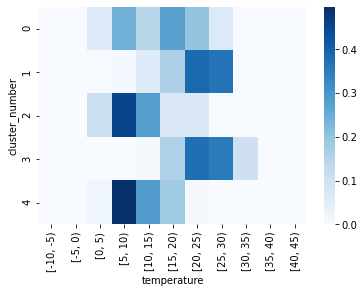

In [167]:
sns.heatmap(cross_cluster_temp.apply(lambda x : x/x.sum(), axis = 1), cmap = 'Blues')

In [108]:
#分割のために区切りを設定
bins_press = [980,985,990,995,1000,1005,1010,1015,1020,1025,1030,1035,1040]

#上の区切りをもとにデータを分割+qcut_temp変数に各データの気圧層を設定
qcut_press = pd.cut(lot_wed_with_cluster.pressure_state,bins_press,right = False)

#クラスタ番号と気圧層を結合
df = pd.concat([lot_wed_with_cluster.cluster_number,qcut_press],axis = 1)

#クラスタ番号と気圧層を軸に集計し、温度層を列に設定
cross_cluster_press = df.groupby(['cluster_number','pressure_state']).size().unstack().fillna(0)
cross_cluster_press

pressure_state,"[980, 985)","[985, 990)","[990, 995)","[995, 1000)","[1000, 1005)","[1005, 1010)","[1010, 1015)","[1015, 1020)","[1020, 1025)","[1025, 1030)","[1030, 1035)","[1035, 1040)"
cluster_number,,,,,,,,,,,,
0,0,1,6,17,26,20,27,13,5,1,0,0
1,0,1,2,7,31,60,36,13,2,0,0,0
2,0,1,3,4,20,35,41,35,16,0,0,0
3,0,0,1,4,36,55,47,1,0,0,0,0
4,0,0,0,0,8,19,45,54,29,7,1,0


<AxesSubplot:xlabel='pressure_state', ylabel='cluster_number'>

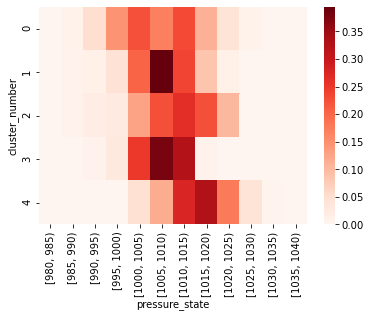

In [140]:
sns.heatmap(cross_cluster_press.apply(lambda x : x/x.sum(), axis = 1), cmap = 'Reds')

In [125]:
cross_cluster_num_1 = lot_wed_with_cluster.groupby(['cluster_number','win_first']).size().unstack().fillna(0)
cross_cluster_num_1

win_first,0,1,2,3,4,5,6,7,8,9
cluster_number,,,,,,,,,,
0,15,7,16,16,12,13,9,6,14,8
1,26,12,18,15,13,8,10,19,15,16
2,14,16,15,18,19,7,21,21,9,15
3,15,16,16,13,9,13,10,15,20,17
4,16,15,17,15,14,13,29,14,13,17


In [124]:
cross_cluster_num_2 = lot_wed_with_cluster.groupby(['cluster_number','win_second']).size().unstack().fillna(0)
cross_cluster_num_2

win_second,0,1,2,3,4,5,6,7,8,9
cluster_number,,,,,,,,,,
0,16,8,15,12,13,5,12,9,8,18
1,15,14,12,19,21,16,13,16,11,15
2,18,17,13,17,15,13,15,16,18,13
3,19,18,10,15,19,15,11,18,12,7
4,13,16,11,25,23,15,15,11,20,14


In [126]:
cross_cluster_num_3 = lot_wed_with_cluster.groupby(['cluster_number','win_third']).size().unstack().fillna(0)
cross_cluster_num_3

win_third,0,1,2,3,4,5,6,7,8,9
cluster_number,,,,,,,,,,
0,7,13,9,20,13,7,13,16,9,9
1,13,18,24,13,11,11,13,21,14,14
2,7,18,22,16,15,11,16,25,13,12
3,16,15,15,19,12,11,14,14,13,15
4,14,13,12,19,15,21,15,20,18,16


<AxesSubplot:xlabel='pressure_state', ylabel='cluster_number'>

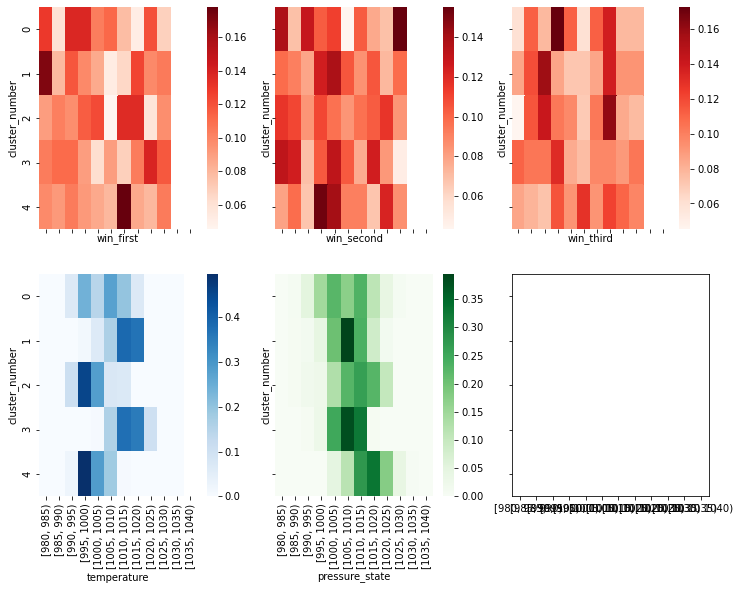

In [170]:
fig, axes = plt.subplots(2, 3, figsize=(12, 9), sharex=True, sharey=True)
sns.heatmap(cross_cluster_num_1.apply(lambda x : x/x.sum(), axis = 1), cmap = 'Reds',ax=axes[0, 0])
sns.heatmap(cross_cluster_num_2.apply(lambda x : x/x.sum(), axis = 1), cmap = 'Reds',ax=axes[0, 1])
sns.heatmap(cross_cluster_num_3.apply(lambda x : x/x.sum(), axis = 1), cmap = 'Reds',ax=axes[0, 2])

sns.heatmap(cross_cluster_temp.apply(lambda x : x/x.sum(), axis = 1), cmap = 'Blues',ax=axes[1, 0])
sns.heatmap(cross_cluster_press.apply(lambda x : x/x.sum(), axis = 1), cmap = 'Greens',ax=axes[1, 1])

<AxesSubplot:xlabel='win_third', ylabel='cluster_number'>

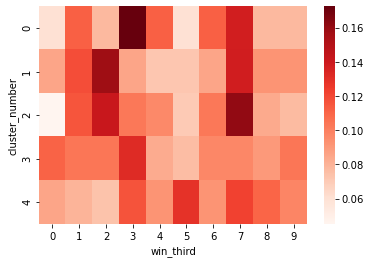

In [173]:
sns.heatmap(cross_cluster_num_3.apply(lambda x : x/x.sum(), axis = 1), cmap = 'Reds')

経過時間:0.45200610160827637[sec]


Text(0, 0.5, 'Distortion')

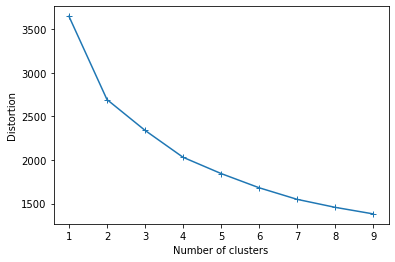

In [57]:
#エルボー法によるクラスタ数の推定
#クラスタ数を増やしてみて、それぞれの距離の総和を求める
dist_list = []
start = time.time()

for i in range(1,10):
    # KMeansクラスの初期化
    kmeans = KMeans(init ='random',
                    n_clusters = i,
                    random_state = 0)
    
    # クラスターの重心を計算
    kmeans.fit(lot_wed_std)

    # 距離の総和を示すAttribute:inertia_を用いてdist_listに結果を入れていく
    dist_list.append(kmeans.inertia_)

# %%%%45000データかつ4次元の距離平均計算を何十回もするために時間がかかる%%%%%
elapsed_time = time.time()-start
print('経過時間:{0}'.format(elapsed_time) + '[sec]')

# グラフを表示
plt.plot(range(1,10),dist_list, marker = '+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

経過時間:0.4134190082550049[sec]
経過時間:0.5190780162811279[sec]


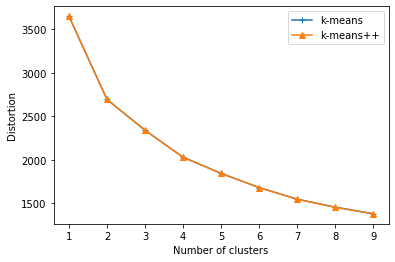

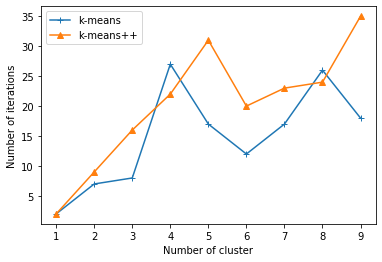

In [58]:
# エルボー法による推定。クラスター数を1から10に増やしてそれぞれの距離の総和を求める
dist_list_ran = []
dist_list_km = []
iter_list_ran = []
iter_list_km = []

start = time.time()
for i in range(1,10):
    # KMeansクラスの初期化
    kmeans_ran = KMeans(init ='random',
                    n_clusters = i,
                    random_state = 0)
    
    # クラスターの重心を計算
    kmeans_ran.fit_predict(lot_wed_std)

    # 距離の総和を示すAttribute:inertia_を用いてdist_listに結果を入れていく
    dist_list_ran.append(kmeans_ran.inertia_)
    
    # 反復回数を示すAttribute:n_iter_を用いてiter_listに結果を入れていく
    iter_list_ran.append(kmeans_ran.n_iter_)

# %%%%45000データかつ4次元の距離平均計算を何十回もするために時間がかかる%%%%%
elapsed_time = time.time()-start
print('経過時間:{0}'.format(elapsed_time) + '[sec]')

# k-means++の場合も同様に
start = time.time()
for i in range(1,10):
    kmeans_km = KMeans(init ='k-means++',
                    n_clusters = i,
                    random_state = 0)
    kmeans_km.fit_predict(lot_wed_std)
    dist_list_km.append(kmeans_km.inertia_)
    iter_list_km.append(kmeans_km.n_iter_)
    
elapsed_time = time.time()-start
print('経過時間:{0}'.format(elapsed_time) + '[sec]')


# グラフを表示: 距離の総和
plt.figure(figsize = (6, 4))
plt.plot(range(1,10), dist_list_ran, marker = '+', label = 'k-means')
plt.plot(range(1,10), dist_list_km, marker = '^', label = 'k-means++')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
# 凡例を表示
plt.legend()

# グラフを表示: 反復回数
plt.figure(figsize = (6, 4))
plt.plot(range(1,10),iter_list_ran, marker = '+', label = 'k-means')
plt.plot(range(1,10),iter_list_km, marker = '^', label = 'k-means++')
plt.xlabel('Number of cluster')
plt.ylabel('Number of iterations')
# 凡例を表示
plt.legend()

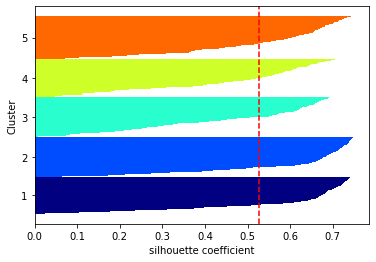

In [44]:
#シルエット分析（クラスタ内のサンプルがどの程度密にグループされているか（凝集度）の目安となるグラフを可視化）

km = KMeans(init = 'random',n_clusters = 5,random_state = 0)
y_km = km.fit_predict(lot_wed_new)

cluster_labels = np.unique(y_km)       # y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算
silhouette_vals = silhouette_samples(lot_wed_new,y_km,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               # 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()